## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

###  Домашнее задание №3. Обработка текстов. Линейная классификация.

Задание выполнил(а): Свои фамилия и имя


### Общая информация
__Дата выдачи:__ 28.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_03_Фамилия_Имя.ipynb

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

В задании вам предоставлены реальные текстовые данные. 

Необходимо построить алгоритм, который будет по тексту документа определять тип источника:
 - Микроблоги
 - Новости
 - Отзывы
 - Форумы
 - Блоги
 - Видео
 - Мессенджеры

## Часть 1. Работа с текстовыми данными

 ### 1. Исследование данных

[2 балла]

Скачаем данные отсюда:
https://yadi.sk/d/o3cPgFAq5gALiw

In [115]:
D = pd.read_csv('texts_dataset.csv', sep=';', index_col=0)

D:\q1\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
D.head()

,Дата,ID сообщения,Заголовок,Текст,Дублей,Тип источника
0,27.04.2019 13:18,1396238,NaN,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",1.0,Микроблоги
1,27.04.2019 13:15,1396239,NaN,Почему Немагия сделала обзор на Тинькова? #нем...,1.0,Микроблоги
2,27.04.2019 13:10,1396248,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",2.0,Новости
3,27.04.2019 13:06,1396243,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",2.0,Новости
4,27.04.2019 13:03,1396186,Тинькофф Страхование: Не купить полис без подп...,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,1.0,Отзывы


Далее будем использовать лишь поля  "Текст", "Тип источника"

In [117]:
D = D[[ "Текст", "Тип источника"]]

In [118]:
D.head()

,Текст,Тип источника
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [119]:
for i in D['Тип источника'].unique():
    print (i)

Микроблоги
Новости
Отзывы
Форумы
Блоги
Видео
Мессенджеры
nan


In [120]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200206 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199578 non-null object
Тип источника    199993 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


Удалим объекты с пропусками

In [121]:
D.dropna(axis = 0, inplace=True)

In [122]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199568 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199568 non-null object
Тип источника    199568 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


#### 1.1 Выведите среднюю длину текстов в каждом классе. Что можно сказать о данных? Что можно сказать о каждом классе?

In [90]:
topics=D['Тип источника'].unique()


In [159]:
D.describe()

,Текст,Тип источника
count,199568,199568
unique,174980,7
top,"В связи с Новым Годом, набираем новую команду....",Форумы
freq,1856,69136


не очень эффективный способ....

In [54]:
d={}
for j in range(len(topics)):
    temp=0
    k=""
    for i in D[D['Тип источника']==topics[j]]['Текст']:
        k=k+i
        temp=temp+1
    d[j]=len(k)/temp
print(d)

{0: 170.06141040462427, 1: 2602.3423206042803, 2: 550.4785651967005, 3: 462.227363457533, 4: 3490.84946848899, 5: 905.1847899159663, 6: 943.7823968821045}


In [412]:
print(topics)

['Микроблоги' 'Новости' 'Отзывы' 'Форумы' 'Блоги' 'Видео' 'Мессенджеры']


Можно сказать, что текста распределены крайне неравномерно в зависимости от категории

#### 1.2 Приведите тексты к нижнему регистру и токенезируйте их

используйте word_tokenize из nltk.tokenize

In [91]:
#import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download()

In [25]:
tt=D[:5]['Текст']
tt

0    -Здравствуйте, тинькофф банк\n-Мать твою ебал\...
1    Почему Немагия сделала обзор на Тинькова? #нем...
2    13:01, 27.04.2019 \n\nПоделиться:\n\n  \n  57 ...
3    13:01, 27.04.2019 \n\nПоделиться:\n\n  \n  44 ...
4    Первый отзыв без оценки:&nbsp;\nhttps://www.ba...
Name: Текст, dtype: object

In [27]:
D[:5]

,Текст,Тип источника
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [92]:
DD=D.dropna()

In [468]:
DDD=DD[:50]

In [353]:
tokens=[[w for w in word_tokenize(t.lower())] for t in DD['Текст']]

In [490]:
DD = DD.reset_index(drop=True)

In [491]:
DD=DD.copy()
for i in range(len(DD['Текст'])):
    DD['Текст'][i]=tokens[i]

In [495]:
DD.tail()

,Текст,Тип источника
199563,"[урганта, же, тинькофф, банк, прибрал, ,, альф...",Форумы
199564,"[урганта, же, тинькофф, банк, прибрал, ,, альф...",Новости
199565,"[цитататинькофф, банк, пишет, :, эта, задержка...",Форумы
199566,"[банк, «, тинькофф, », «, лег, », второй, раз,...",Микроблоги
199567,"[банк, «, тинькофф, », «, лег, », второй, раз,...",Микроблоги


#### 1.3 Оставьте в каждом документе токены содержащие  только буквы русского или английского алфавита.


по сути тот же код, что и сверху (+одно условие), но сказали не менять ничего в формулировке заданий, поэтому написал то же самое..........

In [493]:
DD.head()

,Текст,Тип источника
0,"[-здравствуйте, ,, тинькофф, банк, -мать, твою...",Микроблоги
1,"[почему, немагия, сделала, обзор, на, тинькова...",Микроблоги
2,"[13:01, ,, 27.04.2019, поделиться, :, 57, forb...",Новости
3,"[13:01, ,, 27.04.2019, поделиться, :, 44, forb...",Новости
4,"[первый, отзыв, без, оценки, :, &, nbsp, ;, ht...",Отзывы


In [514]:
alpha_token=[[t for t in w if t.isalpha()] for w in tokens]
print(alpha_token[0])   

['тинькофф', 'банк', 'твою', 'ебал', 'досвидания']


In [515]:
print(alpha_token[1])  

['почему', 'немагия', 'сделала', 'обзор', 'на', 'тинькова', 'немагия', 'тиньков', 'банк', 'интернет', 'блогеры', 'https']


In [479]:
DD=DD.copy()
for i in range(len(DD['Текст'])):
    DD['Текст'][i]=alpha_token[i]

#### 1.4 Выведите 20 слов, которые встечаются в наибольшем числе документов. Что можно сказать об этих словах?

Забегая вперед, могу сказать, что, в большинстве своем, это -- предлоги

In [386]:
d={}
for i in DD['Текст']:
    for j in i:
        if j in d:
            d[j]=d[j]+1
        else:
            d[j]=1

TypeError: unhashable type: 'slice'

In [390]:
d=sorted(d.items(), key=lambda p: p[1],reverse=True)

In [395]:
d[:20]

[('в', 914913),
 ('и', 736412),
 ('на', 493702),
 ('не', 374041),
 ('с', 317613),
 ('по', 258911),
 ('что', 250718),
 ('nbsp', 197102),
 ('банк', 178801),
 ('тинькофф', 156389),
 ('для', 150319),
 ('а', 148790),
 ('за', 143173),
 ('как', 134793),
 ('это', 129586),
 ('банка', 116380),
 ('от', 110718),
 ('у', 108498),
 ('я', 107363),
 ('к', 99340)]

#### 1.5 Выведите 20 слов, которые встечаются в наименьшем числе документов 

In [411]:
d[::-1][:20]

[('сверкало', 1),
 ('советсткую', 1),
 ('заказывый', 1),
 ('пэйпассу', 1),
 ('pandeglol', 1),
 ('выписного', 1),
 ('наличгыми', 1),
 ('кредитчику', 1),
 ('сварганили', 1),
 ('отреклось', 1),
 ('netesov', 1),
 ('повалится', 1),
 ('кэшбжком', 1),
 ('устанлвлено', 1),
 ('психую', 1),
 ('jagger', 1),
 ('фейсу', 1),
 ('охеренный', 1),
 ('вардер', 1),
 ('автообмена', 1)]

### 2. Подготовка данных

[3 балла]

####  2.1 Разделите выборку на обучающую и тестовую в соотношении 70:30  
#### 2.2 Обучите BOW векторы на обучающей выборке и примените преобразование к обучающей и тестовой¶

In [124]:
temp_DD=D

In [518]:
texts_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in temp_DD['Текст']]

In [529]:
temp_DD=temp_DD.reset_index(drop=True)

In [532]:
temp_DD=temp_DD.copy()
for i in range(len(temp_DD['Текст'])):
    temp_DD['Текст'][i]=texts_tokenized[i]

In [13]:
from sklearn.model_selection import train_test_split

In [534]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()

In [733]:
X=temp_DD['Текст']
y=temp_DD['Тип источника']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=13)

In [734]:
X_train_bow=cnt_vec.fit_transform(X_train)
X_test_bow=cnt_vec.transform(X_test)

In [735]:
X_train_bow.shape,X_test_bow.shape

((139697, 277414), (59871, 277414))

#### 2.3 Обучите TFIDF векторы на обучающей выборке и примените преобразование к тестовой

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(stop_words='english')

In [737]:
X_train_tfidf1 = tfidf_vec.fit_transform(X_train)
X_test_tfidf1 = tfidf_vec.transform(X_test)

In [738]:
X_train_tfidf1.shape, X_test_tfidf1.shape

((139697, 277186), (59871, 277186))

#### 2.4 Примените стемминг к текстам обучающей и тестовой выборки. Обучите TFIDF векторы на полученных данных.

In [100]:
from nltk.stem.snowball import SnowballStemmer

In [102]:
stemmer = SnowballStemmer('russian')

In [131]:
texts_tokenized = [' '.join([stemmer.stem(w) for w in word_tokenize(t) if w.isalpha()]) for t in temp_DD['Текст']]

In [132]:
temp_DD=temp_DD.reset_index(drop=True)

In [133]:
temp_DD=temp_DD.copy()
for i in range(len(temp_DD['Текст'])):
    temp_DD['Текст'][i]=texts_tokenized[i]

In [134]:
temp_DD.head()

,Текст,Тип источника
0,тинькофф банк тво еба досвидан,Микроблоги
1,поч немаг сдела обзор на тиньков немаг тиньк б...,Микроблоги
2,подел Forbes назва сам экстравагантн инвестиц ...,Новости
3,подел Forbes назва сам экстравагантн инвестиц ...,Новости
4,перв отз без оценк nbsp https кратк сут не уда...,Отзывы


In [135]:
temp_DD.tail()

,Текст,Тип источника
199563,ургант же тинькофф банк прибра альф оста молод...,Форумы
199564,ургант же тинькофф банк прибра альф оста молод...,Новости
199565,цитататинькофф банк пишет эт задержк чист техн...,Форумы
199566,банк тинькофф лег втор раз за недел https,Микроблоги
199567,банк тинькофф лег втор раз за недел https,Микроблоги


In [136]:
X=temp_DD['Текст']
y=temp_DD['Тип источника']
X_train_tfidf_stem, X_test_tfidf_stem, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=13)

In [139]:
X_train_tfidf_stem=tfidf_vec.fit_transform(X_train_tfidf_stem)
X_test_tfidf_stem = tfidf_vec.transform(X_test_tfidf_stem)

#### 2.5 Сравните размеры полученных матриц

In [140]:
X_train_tfidf_stem.shape,X_test_tfidf_stem.shape

((139697, 123766), (59871, 123766))

### 3. Обучение модели и оценка результатов

[2 балла]

#### 3.1 Обучите логистическую регрессию SGDClassifier на данных, полученных в пунктах 2.2, 2.3 и 2.4.
#### Оцените качество на отложенной выборке по метрике accuracy

In [14]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix

In [141]:
clf = linear_model.SGDClassifier(random_state=43)

In [746]:
p22=clf.fit(X_train_bow,y_train)

D:\q1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [747]:
p22_score=accuracy_score(y_test,p22.predict(X_test_bow))
p22_score

0.8397220691152645

In [748]:
p23=clf.fit(X_train_tfidf1,y_train)

D:\q1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [749]:
p23_score=accuracy_score(y_test,p23.predict(X_test_tfidf1))
p23_score

0.8345943779125119

In [142]:
p24=clf.fit(X_train_tfidf_stem,y_train)

D:\q1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [143]:
p24_score=accuracy_score(y_test,p24.predict(X_test_tfidf_stem))
p24_score

0.8238379181907768

#### 3.2 Какой алгоритм показал наилучшее качество классификации? Как это можно объяснить?

без стемминга показал результат лучше чем со стеммингом, скорее всего, из-за того что русский язык реализован не так качественно, как хотелось бы

#### 3.3 Выведите несколько документов из тестовой выборки, на которых были допущены ошибки. Что можно о них сказать?

In [144]:
y_test_reset=y_test

In [145]:
ind=y_test_reset.index

In [146]:
k=[]
for i in range(len(y_test)):
    k.append(i)

In [147]:
y_index=pd.DataFrame(y_test)
y_index['index'] = pd.Series(k,index=y_index.index)
y_index['number'] = pd.Series(ind,index=y_index.index)
y_itog=y_index.set_index('index')
y_itog.head()

,Тип источника,number
index,,
0,Отзывы,189513
1,Форумы,168373
2,Отзывы,51154
3,Форумы,139497
4,Новости,62076


In [148]:
y_itog['number'][0]

189513

In [149]:
pred=p24.predict(X_test_tfidf_stem)

In [150]:
k=0
examples=[]
for i in range(len(y_itog)):
    if y_itog['Тип источника'][i]!=pred[i] and k<5:
        examples.append(y_itog['number'][i])
        print(y_itog['number'][i])
        k=k+1
    elif k>=5:
        break

139497
28789
52197
61089
198765


In [153]:
for i in range(len(examples)):
    print(i+1,X[examples[i]])


1 лет назад взял кред на отдава в течен лет по в месяц давн давн должн был закр отдава через почт квитанц не оста сейчас банк треб с нас за задержк в течен лет вед суд банк на запрос не отвеча не выда ни договор о кред ни истор платеж сегодн арестова счет в сбербанк посовет что можн предприня в так ситуац
2 свинк пепп написа а фирм quot следств ведут злы пчел quot продолжа сво работ огромн благодарн все команд за помощ поддержк и вер что справедлив восторжеств итак изначальн тем нов сер был друг но ввид внов откр обстоятельств мы реш измен тем дума прекрасн понима что нигд этот фашист не работа нич не зарабатыва а живет за счет тог что собра на двух безнадежн бесперспективн инвалид ну что же пидор сыгра ещ одн парт в записочк напомн теб ебанут что в записк в сорочан теб предлож сам призна что ты нихр не зан с ребенк а прост отдыха ты уебищ сутк упира но все же был вынужд сдела а сейчас будет втор сер ты памперс оден когд дальш чита будеш я сейчас вылож все тво банковск счет их был мног

Можно сказать, что стемминг работает довольно плохо, просто обрезая конец слов, не учитывая лексикографические нормы русского языка. Также (зная матрицу ошибок, что будет дальше) видно, что ошибки чаще всего возникают во вемя путаницы категорий "Отзывы" и "Форумы", что вполне объяснимо, так как текста этих категорий в принципе трудноотличимы.

#### 3.4 Постройте матрицу ошибок. Проанализируйте ее.

In [154]:
names=dict(reversed(item) for item in y_itog['Тип источника'].value_counts().items())
names

{20744: 'Форумы',
 15240: 'Отзывы',
 11424: 'Новости',
 6380: 'Микроблоги',
 3614: 'Видео',
 1568: 'Блоги',
 901: 'Мессенджеры'}

Посчитаем количество текстов каждого раздела, чтобы корректно сопоставить их в матрице ошибок

In [157]:
matr=confusion_matrix(y_test,p24.predict(X_test_tfidf_stem))
labels=[]
for i in range(len(matr)):
    for j in names:
        if j==sum(matr[i]):
            labels.append(names[j])
labels

['Блоги', 'Видео', 'Мессенджеры', 'Микроблоги', 'Новости', 'Отзывы', 'Форумы']

In [158]:
conf_matrix = pd.DataFrame(matr, columns=labels, index=['actual_'+k for k in labels])
conf_matrix=conf_matrix.add_prefix('predicted_')
conf_matrix

,predicted_Блоги,predicted_Видео,predicted_Мессенджеры,predicted_Микроблоги,predicted_Новости,predicted_Отзывы,predicted_Форумы
actual_Блоги,96,54,0,50,753,232,383
actual_Видео,2,2297,0,239,80,364,632
actual_Мессенджеры,2,36,78,161,360,36,228
actual_Микроблоги,0,108,0,5255,65,246,706
actual_Новости,0,31,2,53,10607,326,405
actual_Отзывы,1,38,0,57,66,12879,2199
actual_Форумы,3,116,2,173,400,1938,18112


Отзывы и форумы довольно часто путаются друг с другом, что понятно, ведь они похожи

## Часть 2. Логистическая регрессия.
[3 балла]

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [15]:

train = pd.read_csv('train.csv')

In [16]:
train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.
​
Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [17]:
_train=train
_train['price1']=228
_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price1
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,228
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,228
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,228
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,228
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,228


In [18]:
#_train=_train.copy()
mask=_train['price_range']==0
mask1=_train['price_range']!=0
_train.loc[mask,'price1']=0
_train.loc[mask1,'price1']=1

In [19]:
_train_drop=_train.drop(columns='price_range')
_train_drop.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price1
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
X=_train_drop.drop(columns='price1')
y=_train_drop['price1']

Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=13)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ssc=StandardScaler()

In [24]:
ssc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
print(ssc.transform(X_train))

[[-1.42097126 -0.98300159 -0.04512598 ...  0.5674521  -1.00716855
  -1.00142959]
 [ 0.77914049 -0.98300159 -0.90216973 ...  0.5674521  -1.00716855
   0.99857245]
 [-1.62865815  1.01729235  0.07730884 ...  0.5674521   0.99288247
   0.99857245]
 ...
 [-0.98277472  1.01729235  1.66896153 ... -1.76226327  0.99288247
  -1.00142959]
 [-1.23838937 -0.98300159 -1.2694742  ... -1.76226327 -1.00716855
   0.99857245]
 [ 0.37289579 -0.98300159 -0.1675608  ...  0.5674521   0.99288247
  -1.00142959]]


Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?
Не забывайте, что метод predict_proba вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, precision_score,\
                            precision_recall_curve, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [27]:
lg=LogisticRegression()

In [28]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
accuracy_score(y_test,lg.predict(X_test))

0.9666666666666667

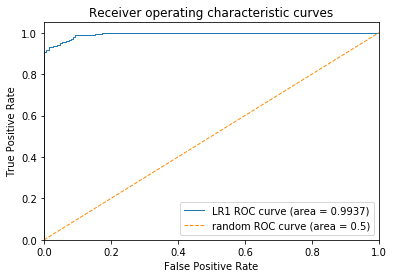

In [30]:
def generate_metrics(prediction):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc
lr_pred1 = lg.predict_proba(X_test)
lr1_fpr, lr1_tpr, lr1_roc_auc = generate_metrics(lr_pred1)
plt.plot(lr1_fpr[1], lr1_tpr[1], lw=1, label='LR1 ROC curve (area = %0.4f)' % lr1_roc_auc[1])
plt.plot([0, 1], [0, 1], lw=1, color='darkorange', linestyle='--', label='random ROC curve (area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc='best')
plt.show()



In [122]:
import numpy as np

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

In [120]:
w=[]
for i in range(len(lg.coef_[0])):
    w.append(lg.coef_[0][i])

In [128]:
col=X_test.columns
d_x=X_test.reset_index(drop=True)
ans=[]
for j in range(len(X_test)):
    l=[]
    for i in col:
        l.append(d_x[i][j])
    a=np.dot(w,l)
    ans.append(a+lg.intercept_[0])
ans[0]


8.699720908667677

(array([ 9., 56., 70., 80., 81., 75., 86., 66., 55., 22.]),
 array([-10.04429834,  -6.7518146 ,  -3.45933086,  -0.16684711,
          3.12563663,   6.41812037,   9.71060412,  13.00308786,
         16.2955716 ,  19.58805535,  22.88053909]),
 <a list of 10 Patch objects>)

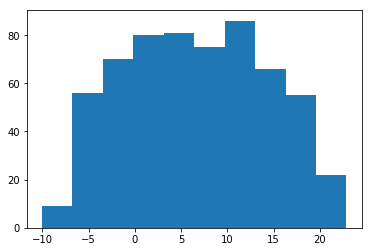

In [146]:
plt.hist(ans)

#### Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

In [147]:
def sigm(x):
    return 1/(1+np.exp(-x))

In [160]:
a=np.linspace(-10,10,1000)

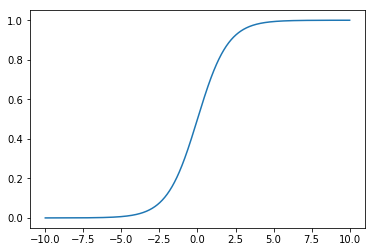

In [161]:
plt.plot(a,sigm(a))

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [193]:
pr_pr=[]
for i in ans:
    pr_pr.append(sigm(i))

In [194]:
score=[]
for i in range(len(pr_pr)):
    score.append(pr_pr[i]-lg.predict_proba(X_test)[:,1][i])
sum(score)

-8.663209039028175e-15

следовательно, массивы выше совпали!

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

### 4. Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$



Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.
Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.
Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково.

В качестве критерия останова необходимо использовать (одновременно):

- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В loss_history необходимо сохранять вычисленное на каждой итерации значение функции потерь.

In [ ]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        pass
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        pass

- Примените логистическую регресиию на той же выборке.
- Посчитайте качество по тем же метрикам.
- Визуализируйте изменение значений функции потерь от номера итераций.

### 5. Бонусное задание 2. 

[0.002 бонусных балла]

Моё тело -- храм.
Сегодня утром там был священник...